In [1]:
import wfm

Abro los archivos en modo binario y los cargo en un diccionario

In [2]:
sfiles = {'100Hz': open('./waveforms/100h.wfm', 'rb'),
         '400Hz': open('./waveforms/400h.wfm', 'rb'),
         '8kHz': open('./waveforms/8kh.wfm', 'rb'),
         '10kHz': open('./waveforms/10kh.wfm', 'rb'),
         '40kHz': open('./waveforms/40kh.wfm', 'rb'),
         '80kHz': open('./waveforms/80kh.wfm', 'rb')
         }

Genero un nuevo diccionario con unicamente la informacion de tiempo y voltaje del canal 1 y 2

In [3]:
sraw = dict()
sdata = dict()
for key in sfiles.keys():
    aux = wfm.parseRigolWFM(sfiles[key])
    sraw[key] = aux
    CH1 = {'tiempo': aux["channel"][1]['samples']['time'], 'voltaje': aux["channel"][1]['samples']['volts']}
    CH2 = {'tiempo': aux["channel"][2]['samples']['time'], 'voltaje': aux["channel"][2]['samples']['volts']}
    CH2['voltaje'] =  list(map(lambda i: i-0.3, CH2['voltaje']))#Por algun motivo v me queda corrido del cero; acomodo manualmentere

    sdata[key] = {'salida': CH1, 'entrada': CH2}

Vamos graficando

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

## Ploteos
Para la punta de la salida del circuito se usa el rojo y para la entrada el azul

1. Extraigo los datos para trabajarlos directamente mediante la creacion de la variable "data" y determino limites del grafico
2. Genero el ploteo
3. A mano por iteracion, ubico las axvline y axhline que son las lineas de amplitud y fase del picp
4. Pongo el cartelito que indica el desfasaje y amplitud usando números manualmente calculados.

Para calcular el desfasaje en grados hago lo siguiente:
1. Calculo el diferencial de $\text{Hz}$ como el pedacito de vuelta que recorre la sinusoide en el diferencial de tiempo $\Delta T$ que es el dato que ya tengo (distancia entre dos picos de las dos frecuencias) $\Delta \text{Hz} = f\cdot \Delta T$. Ahora ya tengo cuánto de un período hay de diferencia entre las señales. Las unidades son $\frac 1 s\cdot s$ con lo cual queda adimensional (es una proporción)
2. Convierto eso a velocidad angular multiplicando por $2\pi \text{ rad}$ quedando radianes
3. Convierto a grados multiplicando por $\frac{180°}{\pi \text{ rad}}$ quedando las unidades en grados.
4. Reoperando queda: $\displaystyle \phi = \Delta t \cdot f\cdot 360$


In [6]:
sinfo = dict()

## Funciones lambda

Voy a hacer un par de funciones para meter info a partir de la misma info en los dict. No es la manera más prolija y pythonica y todo eso pero quiero que ande y ya.

Las funciones get_ operan extrayendo directamente del diccionario de info en la frecuencia especificada. Por ejemplo; get_dif_fase(100) obtiene la diferencia de fase para la medicion de 100Hz que tiene que estar ya registrada en el diccionario

In [7]:
#Calcula desfasaje en grados
dif_fase = lambda t1, t2, frec: abs(t1-t2)*frec*360
get_dif_fase = lambda frec: dif_fase(sinfo[frec]['fase_cero_salida'], sinfo[frec]['fase_cero_entrada'], sinfo[frec]['frecuencia'])

In [8]:
#Calculadora de ganancia
from math import log
gain = lambda vi, vo: 20*log(vo/vi, 10)
get_gain = lambda frec: gain(sinfo[frec]['amp_entrada'], sinfo[frec]['amp_salida'])

### $100Hz$

In [47]:
act = '100Hz'

In [48]:
sinfo[act] = {'frecuencia': 100,
        'amp_entrada': 9.4,
        'amp_salida': 1.8,
        'fase_cero_salida': 0.0015,
        'fase_cero_entrada': 0.0036,
    }

In [49]:
sinfo[act]['dif_fase'] = get_dif_fase(act)
sinfo[act]['gain'] = get_gain(act)

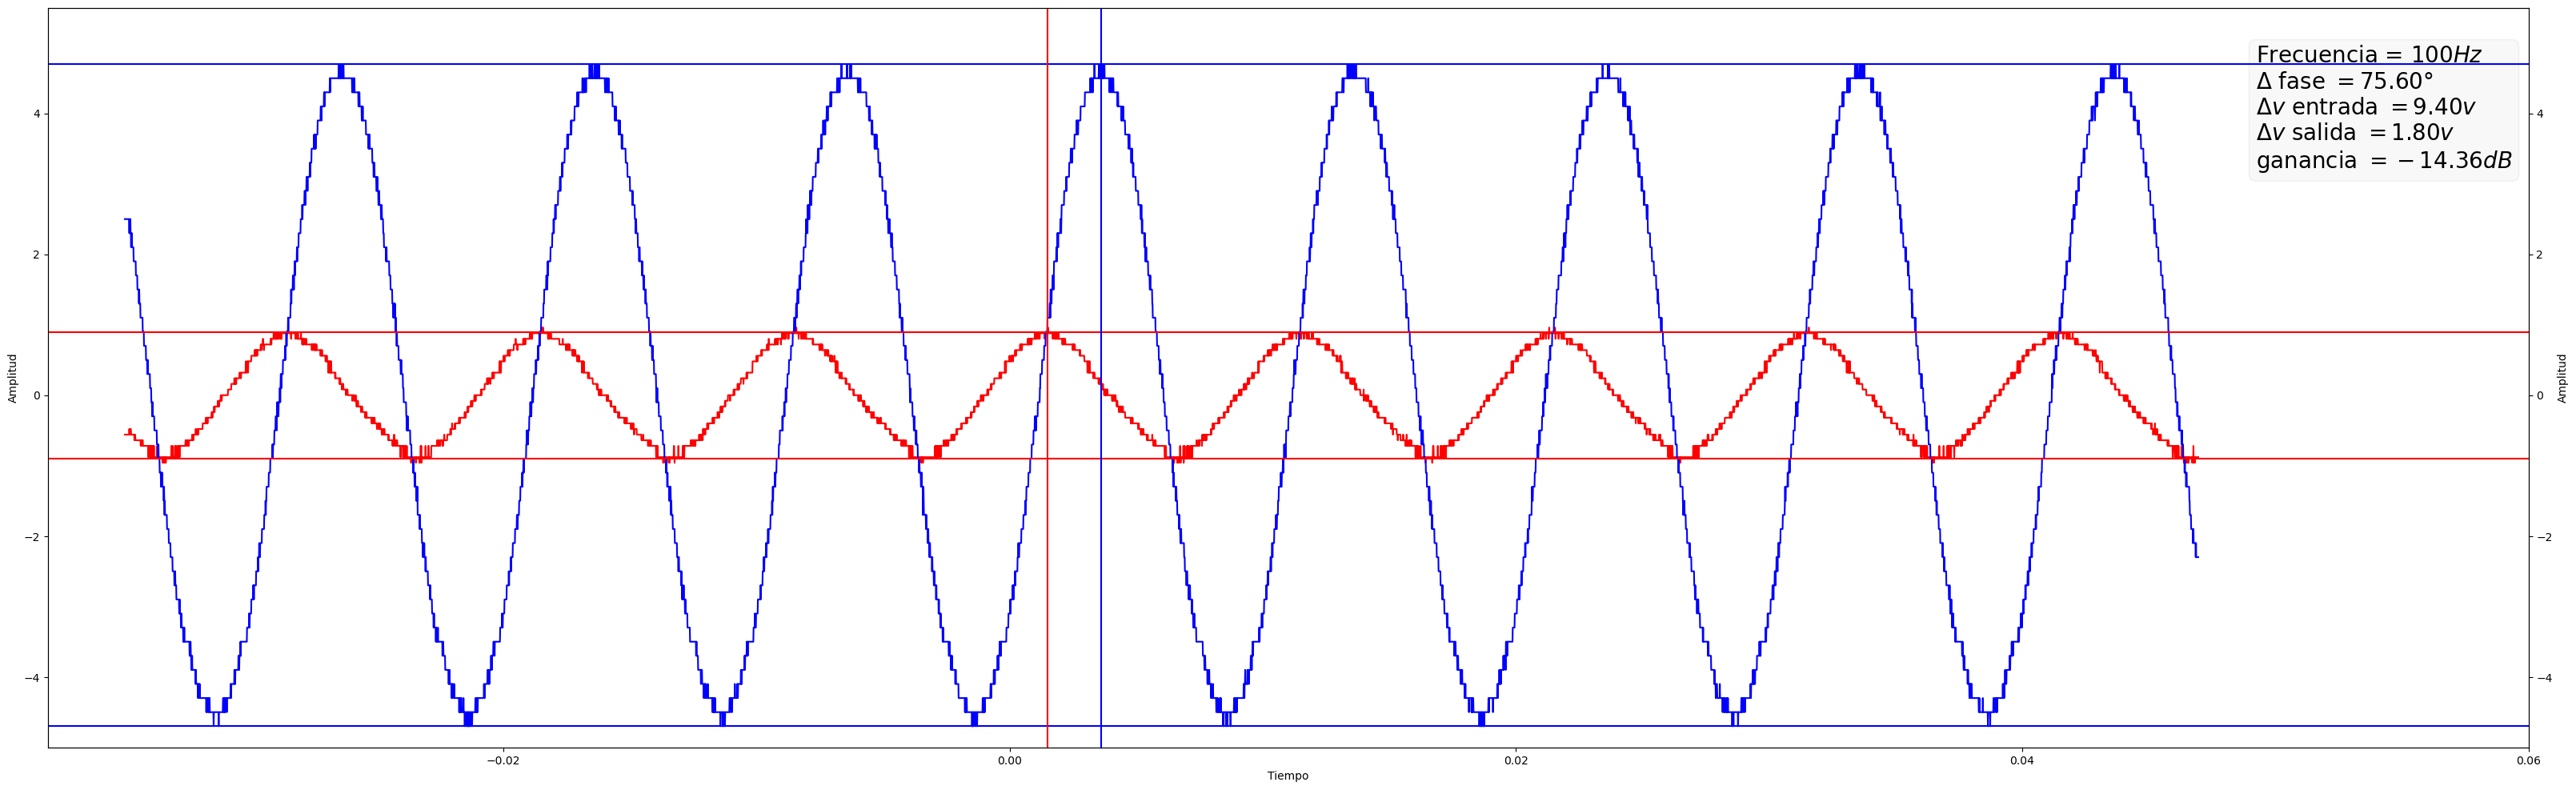

In [50]:
#100 Hz
#1 setup
data = sdata[act]
info = sinfo[act]

xlim = (-0.038, 0.06)
ylim = (-5, 5.5)

#2 ploteo
fig, ax = plt.subplots(figsize=(40, 12))
ax.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")
twin1 = ax.twinx()
twin1.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")

p1 = ax.plot(data['salida']['tiempo'], data['salida']['voltaje'], color='r')
p2 = twin1.plot(data['entrada']['tiempo'], data['entrada']['voltaje'], color='b')

#3, ubcacion de lineas horizontales y verticales
vo1 = plt.axhline(y = info['amp_salida']/2, color = 'r', linestyle = '-')
vo2 = plt.axhline(y = -info['amp_salida']/2, color = 'r', linestyle = '-')

vi1 = plt.axhline(y = (info['amp_entrada']/2), color = 'b', linestyle = '-')
vi2 = plt.axhline(y = (-info['amp_entrada']/2), color = 'b', linestyle = '-')

v1 = plt.axvline(x = info['fase_cero_salida'], color = 'r', linestyle = '-')
v2 = plt.axvline(x = info['fase_cero_entrada'], color = 'b', linestyle = '-')

#4 Informo amplitudes y desfasaje usando numeros de info
props = dict(boxstyle='round', facecolor='gray', fill=True, alpha=0.05)
text_info = '\n'.join((
    r'Frecuencia = $%d Hz$' %info['frecuencia'],
    r'$\Delta$ fase $= %.2f °$' % info['dif_fase'],
    r'$\Delta v$ entrada $ = %.2f v$' %info['amp_entrada'],
    r'$\Delta v$ salida $ = %.2f v$' %info['amp_salida'],
    r'ganancia $= %.2f dB$' % info['gain']
))

ax.text(0.89, 0.95, text_info, fontsize=20, transform=ax.transAxes, verticalalignment='top', bbox=props)
plt.savefig('figs/'+act+'.pdf', format='pdf')
plt.savefig('figs/'+act+'.png', format='png')
plt.plot();

### $400Hz$

In [51]:
act = '400Hz'

In [52]:
sinfo[act] = {'frecuencia': 400,
        'amp_entrada': 9.1,
        'amp_salida': 5.24,
        'fase_cero_salida': 0.04055,
        'fase_cero_entrada': 0.0409,
        'dif_fase': 50.4
    }

In [53]:
sinfo[act]['dif_fase'] = get_dif_fase(act)
sinfo[act]['gain'] = get_gain(act)

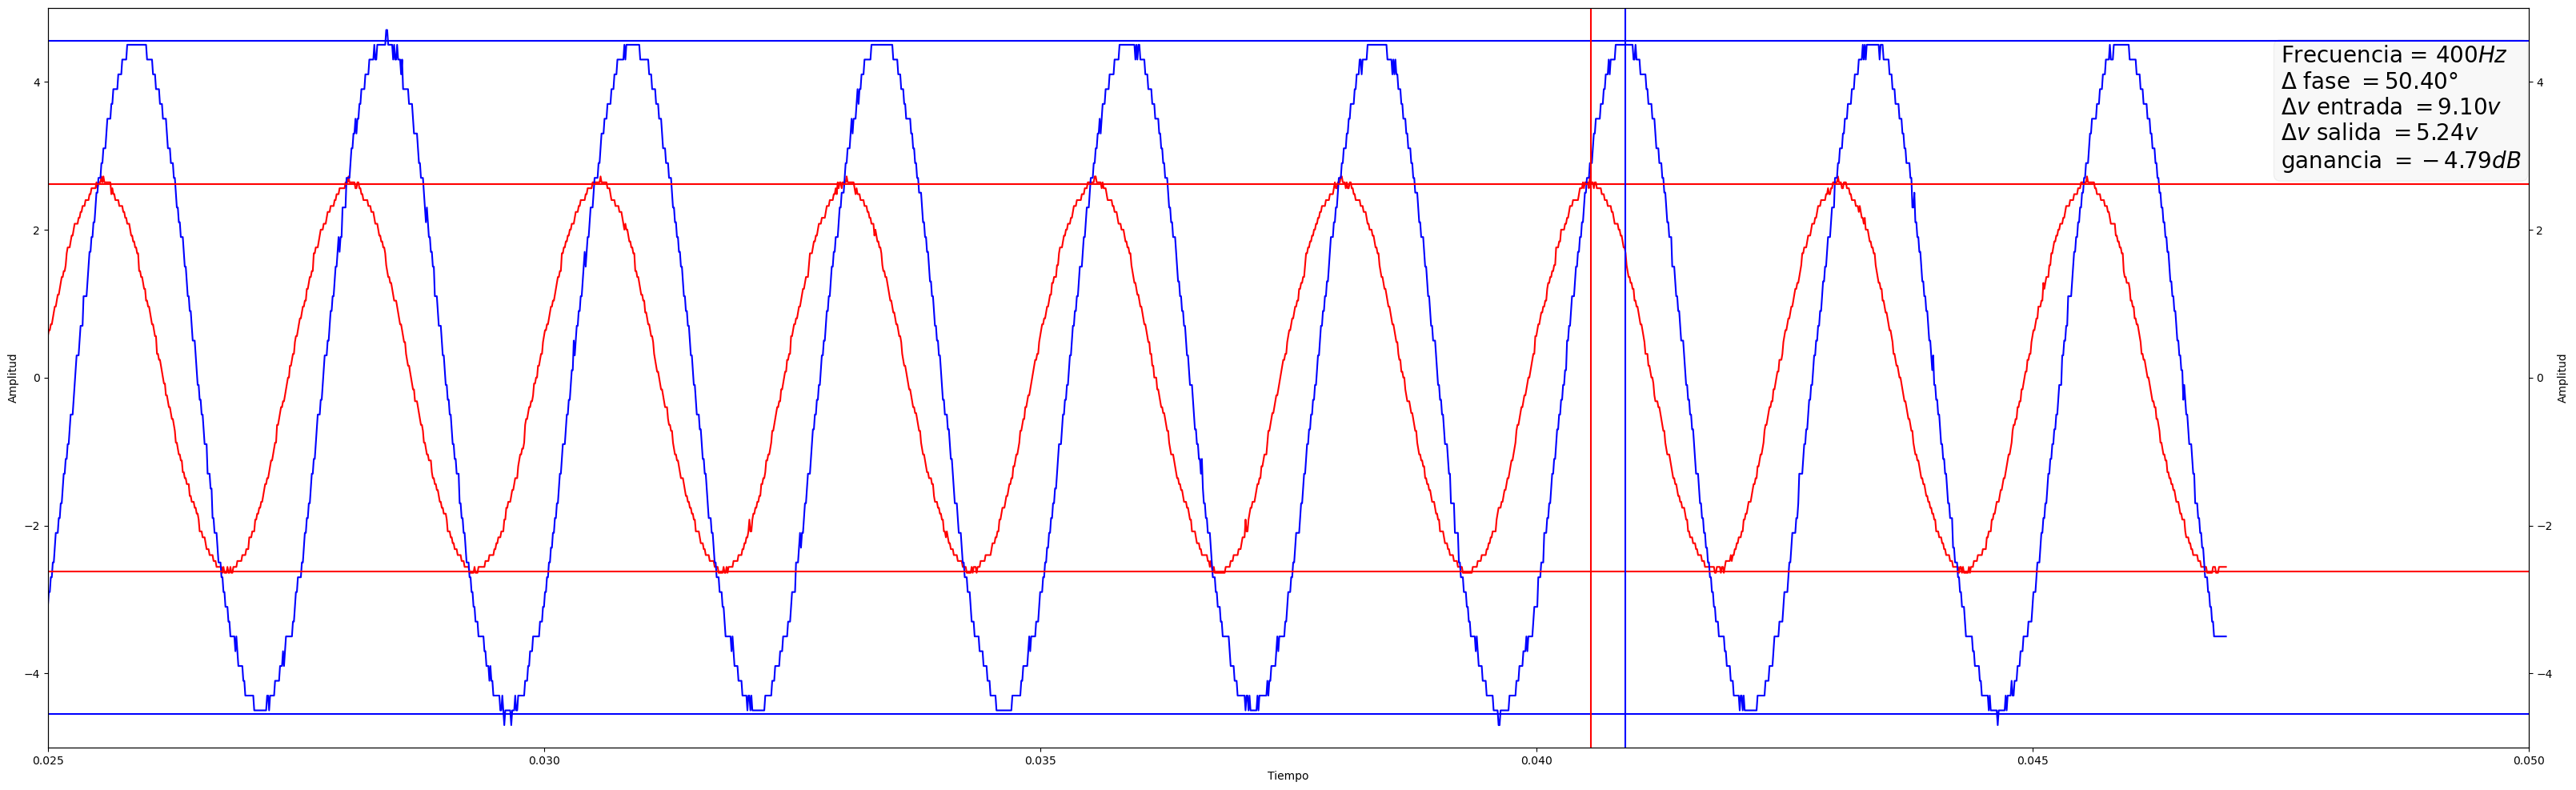

In [54]:
#400 Hz

#1 setup
data = sdata[act]
info = sinfo[act]

xlim = (0.025, 0.05)
ylim = (-5, 5)

#2 ploteo
fig, ax = plt.subplots(figsize=(40, 12))
ax.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")
twin1 = ax.twinx()
twin1.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")

p1 = ax.plot(data['salida']['tiempo'], data['salida']['voltaje'], color='r')
p2 = twin1.plot(data['entrada']['tiempo'], data['entrada']['voltaje'], color='b')

#3, ubcacion de lineas horizontales y verticales
vo1 = plt.axhline(y = info['amp_salida']/2, color = 'r', linestyle = '-')
vo2 = plt.axhline(y = -info['amp_salida']/2, color = 'r', linestyle = '-')

vi1 = plt.axhline(y = (info['amp_entrada']/2), color = 'b', linestyle = '-')
vi2 = plt.axhline(y = (-info['amp_entrada']/2), color = 'b', linestyle = '-')

v1 = plt.axvline(x = info['fase_cero_salida'], color = 'r', linestyle = '-')
v2 = plt.axvline(x = info['fase_cero_entrada'], color = 'b', linestyle = '-')

#4 Informo amplitudes y desfasaje usando numeros de info
props = dict(boxstyle='round', facecolor='gray', fill=True, alpha=0.05)
text_info = '\n'.join((
    r'Frecuencia = $%d Hz$' %info['frecuencia'],
    r'$\Delta$ fase $= %.2f °$' % info['dif_fase'],
    r'$\Delta v$ entrada $ = %.2f v$' %info['amp_entrada'],
    r'$\Delta v$ salida $ = %.2f v$' %info['amp_salida'],
    r'ganancia $= %.2f dB$' % info['gain']
))

ax.text(0.9, 0.95, text_info, fontsize=20, transform=ax.transAxes, verticalalignment='top', bbox=props)
plt.savefig('figs/'+act+'.pdf', format='pdf')
plt.savefig('figs/'+act+'.png', format='png')
plt.plot();

### $8k\text{Hz}$

In [55]:
act = '8kHz'

In [56]:
sinfo[act] = {'frecuencia': 8e3,
        'amp_entrada': 9.2,
        'amp_salida': 8.45,
        'fase_cero_salida': 0.006028,
        'fase_cero_entrada': 0.006024,
        'dif_fase': 50.4
    }

In [57]:
sinfo[act]['dif_fase'] = get_dif_fase(act)
sinfo[act]['gain'] = get_gain(act)

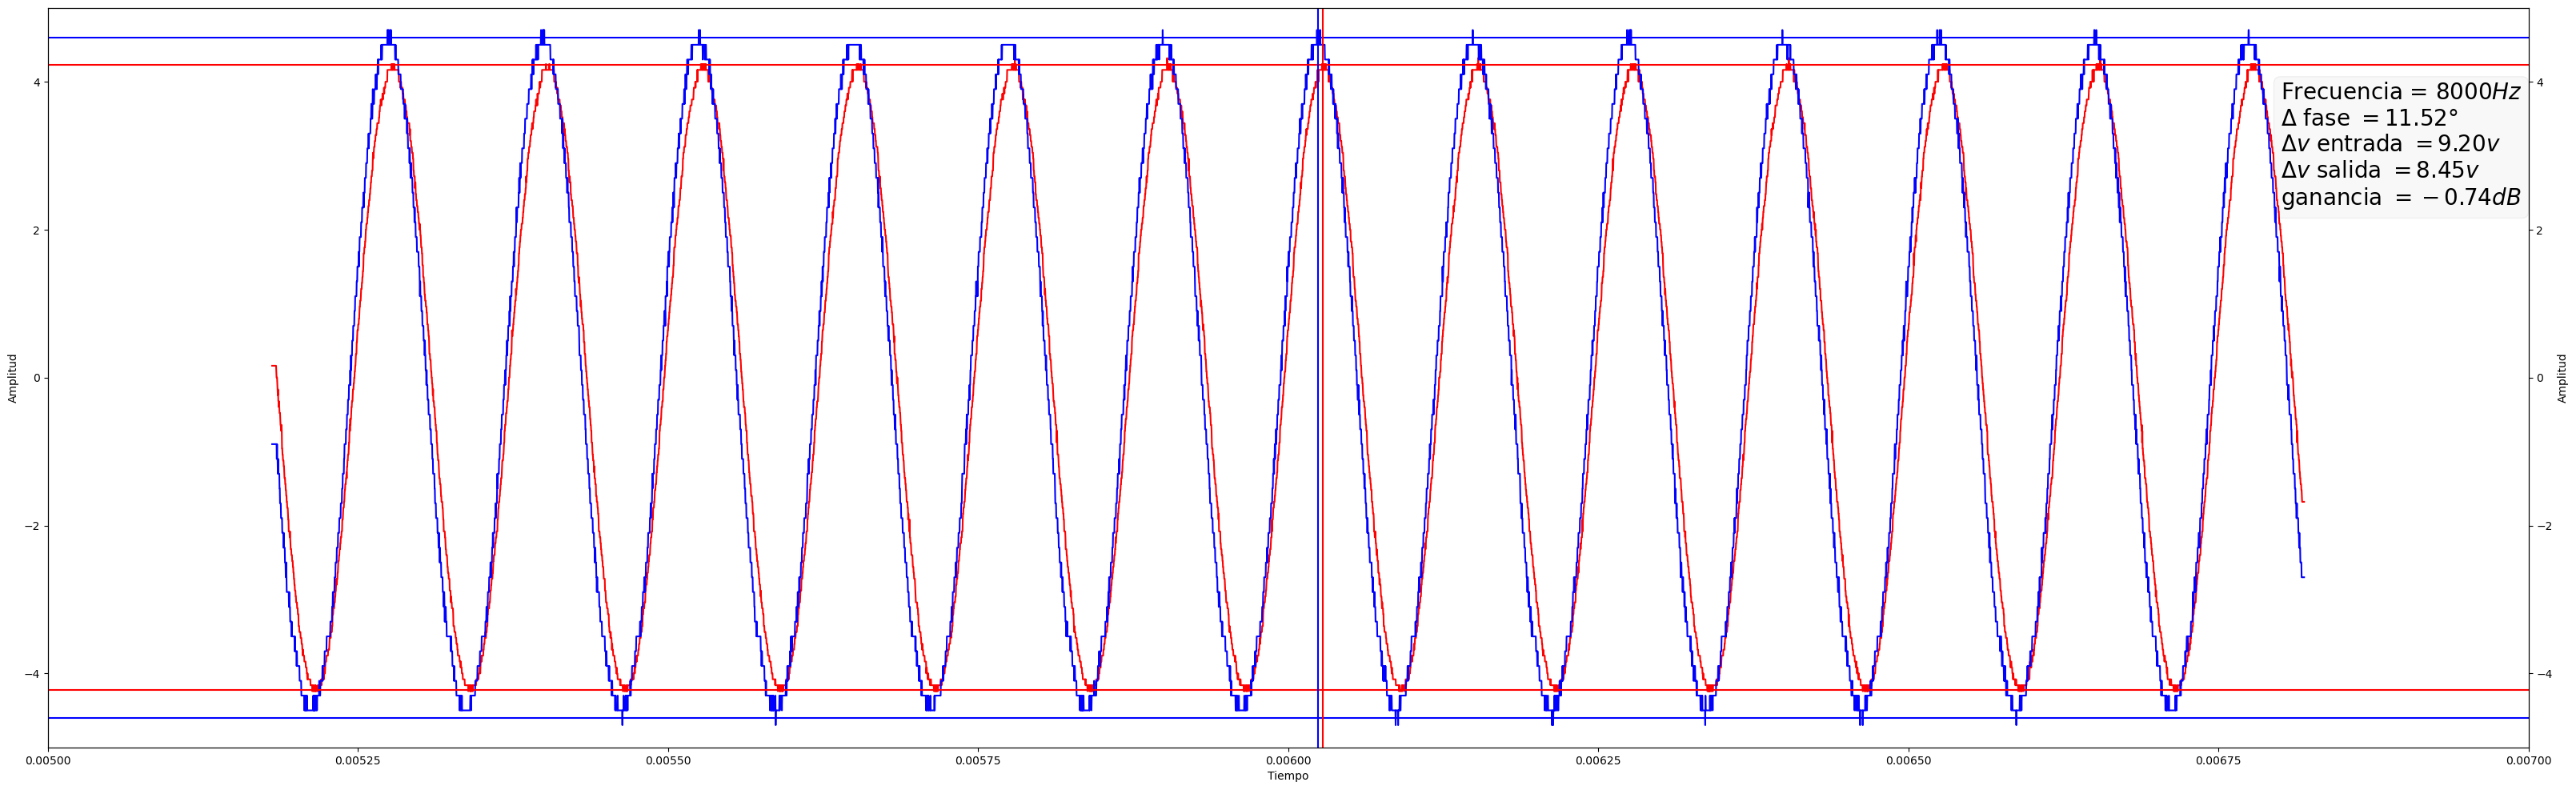

In [58]:
#8 kHz

#1 setup
data = sdata[act]
info = sinfo[act]

xlim = (0.005, 0.007)
ylim = (-5, 5)

#2 ploteo
fig, ax = plt.subplots(figsize=(40, 12))
ax.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")
twin1 = ax.twinx()
twin1.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")

p1 = ax.plot(data['salida']['tiempo'], data['salida']['voltaje'], color='r')
p2 = twin1.plot(data['entrada']['tiempo'], data['entrada']['voltaje'], color='b')

#3, ubcacion de lineas horizontales y verticales
vo1 = plt.axhline(y = info['amp_salida']/2, color = 'r', linestyle = '-')
vo2 = plt.axhline(y = -info['amp_salida']/2, color = 'r', linestyle = '-')

vi1 = plt.axhline(y = (info['amp_entrada']/2), color = 'b', linestyle = '-')
vi2 = plt.axhline(y = (-info['amp_entrada']/2), color = 'b', linestyle = '-')

v1 = plt.axvline(x = info['fase_cero_salida'], color = 'r', linestyle = '-')
v2 = plt.axvline(x = info['fase_cero_entrada'], color = 'b', linestyle = '-')

#4 Informo amplitudes y desfasaje usando numeros de info
props = dict(boxstyle='round', facecolor='gray', fill=True, alpha=0.05)
text_info = '\n'.join((
    r'Frecuencia = $%d Hz$' %info['frecuencia'],
    r'$\Delta$ fase $= %.2f °$' % info['dif_fase'],
    r'$\Delta v$ entrada $ = %.2f v$' %info['amp_entrada'],
    r'$\Delta v$ salida $ = %.2f v$' %info['amp_salida'],
    r'ganancia $= %.2f dB$' % info['gain']
))

ax.text(0.90, 0.9, text_info, fontsize=20, transform=ax.transAxes, verticalalignment='top', bbox=props)
plt.savefig('figs/'+act+'.pdf', format='pdf')
plt.savefig('figs/'+act+'.png', format='png')

plt.plot();

### $10k\text{Hz}$

In [59]:
act = '10kHz'

In [60]:
sinfo[act] = {'frecuencia': 10e3,
        'amp_entrada': 9.2,
        'amp_salida': 8.38,
        'fase_cero_salida': 0.0000226,
        'fase_cero_entrada': 0.000019,
        'dif_fase': 0
    }

In [61]:
sinfo[act]['dif_fase'] = get_dif_fase(act)
sinfo[act]['gain'] = get_gain(act)

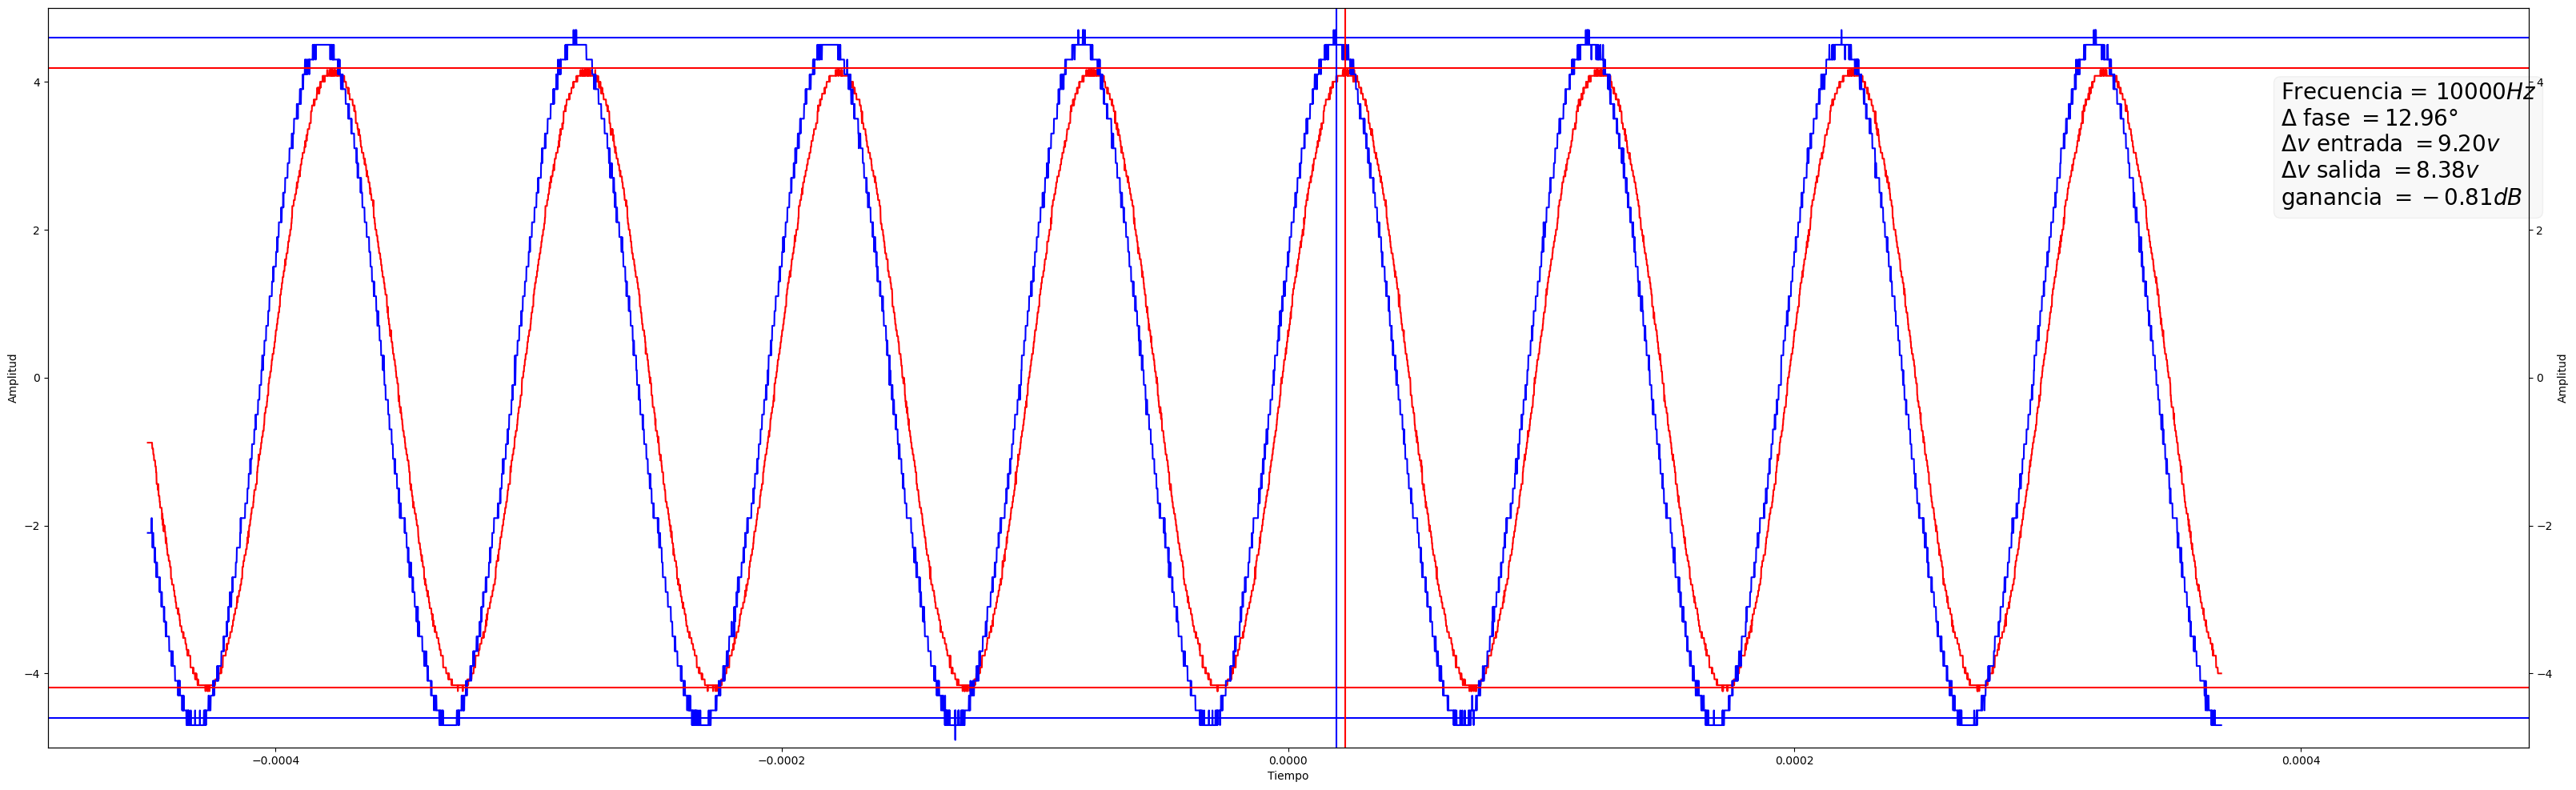

In [62]:
#10 kHz

#1 setup
data = sdata[act]
info = sinfo[act]

xlim = (-0.00049, 0.00049)
ylim = (-5, 5)

#2 ploteo
fig, ax = plt.subplots(figsize=(40, 12))
ax.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")
twin1 = ax.twinx()
twin1.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")

p1 = ax.plot(data['salida']['tiempo'], data['salida']['voltaje'], color='r')
p2 = twin1.plot(data['entrada']['tiempo'], data['entrada']['voltaje'], color='b')

#3, ubcacion de lineas horizontales y verticales
vo1 = plt.axhline(y = info['amp_salida']/2, color = 'r', linestyle = '-')
vo2 = plt.axhline(y = -info['amp_salida']/2, color = 'r', linestyle = '-')

vi1 = plt.axhline(y = (info['amp_entrada']/2), color = 'b', linestyle = '-')
vi2 = plt.axhline(y = (-info['amp_entrada']/2), color = 'b', linestyle = '-')

v1 = plt.axvline(x = info['fase_cero_salida'], color = 'r', linestyle = '-')
v2 = plt.axvline(x = info['fase_cero_entrada'], color = 'b', linestyle = '-')

#4 Informo amplitudes y desfasaje usando numeros de info
props = dict(boxstyle='round', facecolor='gray', fill=True, alpha=0.05)
text_info = '\n'.join((
    r'Frecuencia = $%d Hz$' %info['frecuencia'],
    r'$\Delta$ fase $= %.2f °$' % info['dif_fase'],
    r'$\Delta v$ entrada $ = %.2f v$' %info['amp_entrada'],
    r'$\Delta v$ salida $ = %.2f v$' %info['amp_salida'],
    r'ganancia $= %.2f dB$' % info['gain']
))

ax.text(0.90, 0.9, text_info, fontsize=20, transform=ax.transAxes, verticalalignment='top', bbox=props)
plt.savefig('figs/'+act+'.pdf', format='pdf')
plt.savefig('figs/'+act+'.png', format='png')

plt.plot();

### $40k\text{Hz}$

In [63]:
act = '40kHz'

In [64]:
sinfo[act] = {'frecuencia': 40e3,
        'amp_entrada': 9.2,
        'amp_salida': 5.3,
        'fase_cero_salida':  0.0002305,
        'fase_cero_entrada': 0.0002271,
        'dif_fase': 0
    }

In [65]:
sinfo[act]['dif_fase'] = get_dif_fase(act)
sinfo[act]['gain'] = get_gain(act)

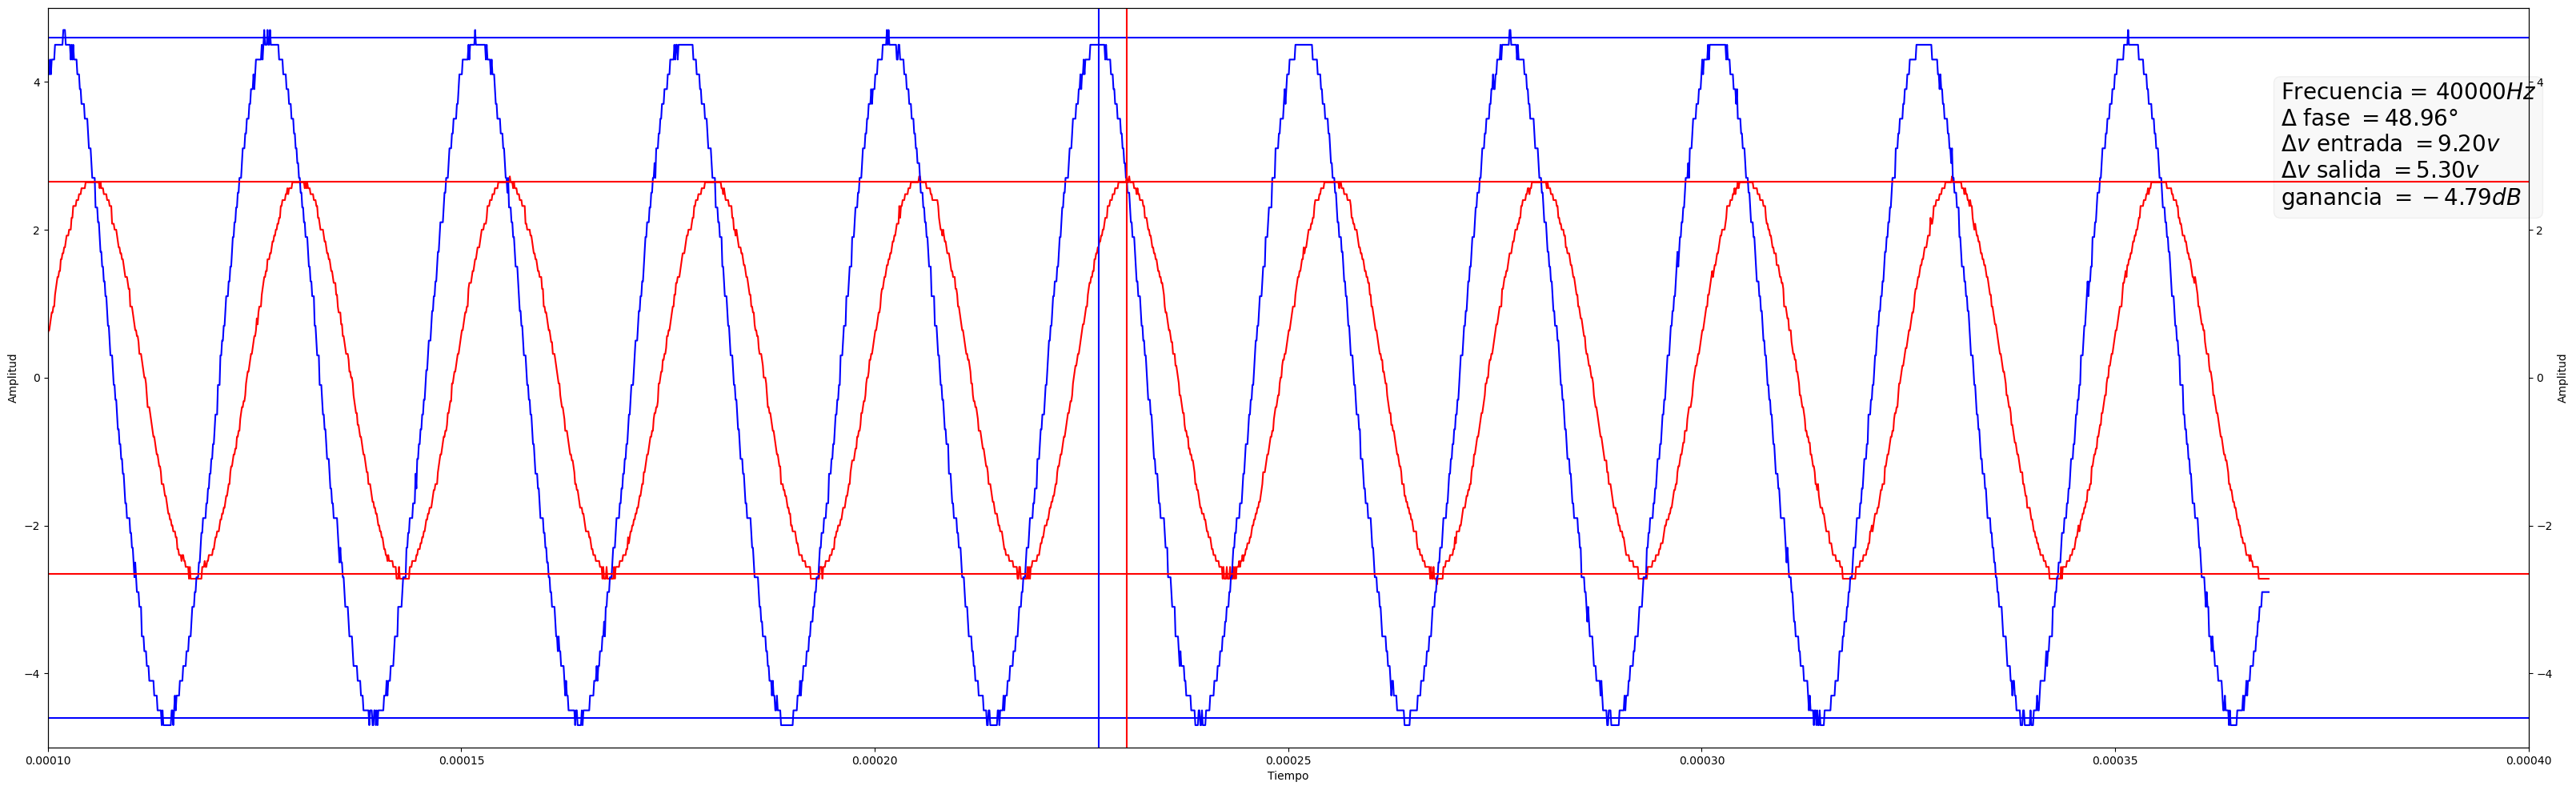

In [66]:
#40 kHz

#1 setup
data = sdata[act]
info = sinfo[act]

xlim = (0.0001, 0.0004)
ylim = (-5, 5)

#2 ploteo
fig, ax = plt.subplots(figsize=(40, 12))
ax.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")
twin1 = ax.twinx()
twin1.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")

p1 = ax.plot(data['salida']['tiempo'], data['salida']['voltaje'], color='r')
p2 = twin1.plot(data['entrada']['tiempo'], data['entrada']['voltaje'], color='b')

#3, ubcacion de lineas horizontales y verticales
vo1 = plt.axhline(y = info['amp_salida']/2, color = 'r', linestyle = '-')
vo2 = plt.axhline(y = -info['amp_salida']/2, color = 'r', linestyle = '-')

vi1 = plt.axhline(y = (info['amp_entrada']/2), color = 'b', linestyle = '-')
vi2 = plt.axhline(y = (-info['amp_entrada']/2), color = 'b', linestyle = '-')

v1 = plt.axvline(x = info['fase_cero_salida'], color = 'r', linestyle = '-')
v2 = plt.axvline(x = info['fase_cero_entrada'], color = 'b', linestyle = '-')

#4 Informo amplitudes y desfasaje usando numeros de info
props = dict(boxstyle='round', facecolor='gray', fill=True, alpha=0.05)
text_info = '\n'.join((
    r'Frecuencia = $%d Hz$' %info['frecuencia'],
    r'$\Delta$ fase $= %.2f °$' % info['dif_fase'],
    r'$\Delta v$ entrada $ = %.2f v$' %info['amp_entrada'],
    r'$\Delta v$ salida $ = %.2f v$' %info['amp_salida'],
    r'ganancia $= %.2f dB$' % info['gain']
))

ax.text(0.90, 0.9, text_info, fontsize=20, transform=ax.transAxes, verticalalignment='top', bbox=props)
plt.savefig('figs/'+act+'.pdf', format='pdf')
plt.savefig('figs/'+act+'.png', format='png')

plt.plot();

### $80k\text{Hz}$

In [70]:
act = '80kHz'

In [71]:
sinfo[act] = {'frecuencia': 80e3,
        'amp_entrada': 9.4,
        'amp_salida': 3.25,
        'fase_cero_salida':  0.0002774,
        'fase_cero_entrada': 0.000275,
        'dif_fase': 0
    }

In [72]:
sinfo[act]['dif_fase'] = get_dif_fase(act)
sinfo[act]['gain'] = get_gain(act)

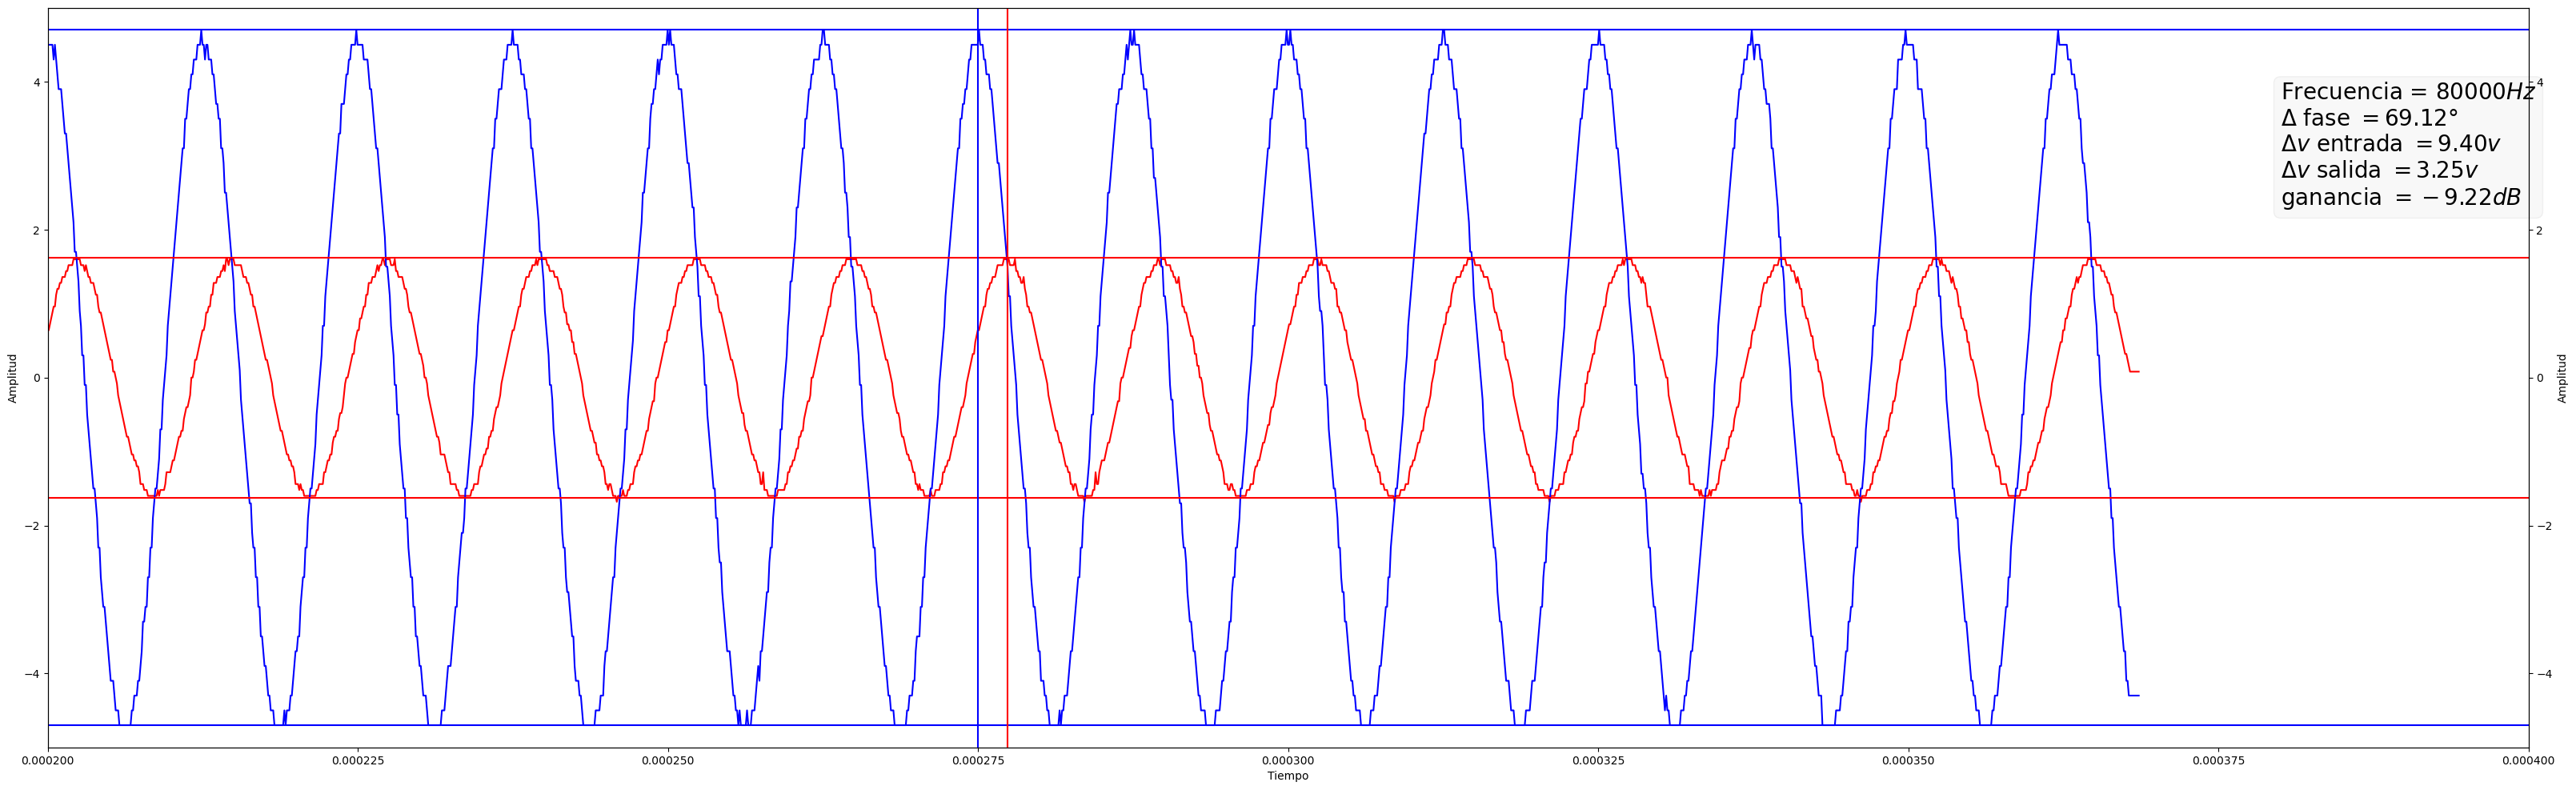

In [73]:
#80 kHz

#1 setup
data = sdata[act]
info = sinfo[act]

xlim = (0.0002, 0.0004)
ylim = (-5, 5)

#2 ploteo
fig, ax = plt.subplots(figsize=(40, 12))
ax.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")
twin1 = ax.twinx()
twin1.set(xlim=xlim, ylim=ylim, xlabel="Tiempo", ylabel="Amplitud")

p1 = ax.plot(data['salida']['tiempo'], data['salida']['voltaje'], color='r')
p2 = twin1.plot(data['entrada']['tiempo'], data['entrada']['voltaje'], color='b')

#3, ubcacion de lineas horizontales y verticales
vo1 = plt.axhline(y = info['amp_salida']/2, color = 'r', linestyle = '-')
vo2 = plt.axhline(y = -info['amp_salida']/2, color = 'r', linestyle = '-')

vi1 = plt.axhline(y = (info['amp_entrada']/2), color = 'b', linestyle = '-')
vi2 = plt.axhline(y = (-info['amp_entrada']/2), color = 'b', linestyle = '-')

v1 = plt.axvline(x = info['fase_cero_salida'], color = 'r', linestyle = '-')
v2 = plt.axvline(x = info['fase_cero_entrada'], color = 'b', linestyle = '-')

#4 Informo amplitudes y desfasaje usando numeros de info
props = dict(boxstyle='round', facecolor='gray', fill=True, alpha=0.05)
text_info = '\n'.join((
    r'Frecuencia = $%d Hz$' %info['frecuencia'],
    r'$\Delta$ fase $= %.2f °$' % info['dif_fase'],
    r'$\Delta v$ entrada $ = %.2f v$' %info['amp_entrada'],
    r'$\Delta v$ salida $ = %.2f v$' %info['amp_salida'],
    r'ganancia $= %.2f dB$' % info['gain']
))

ax.text(0.90, 0.9, text_info, fontsize=20, transform=ax.transAxes, verticalalignment='top', bbox=props)
plt.savefig('figs/'+act+'.pdf', format='pdf')
plt.savefig('figs/'+act+'.png', format='png')

plt.plot();